# Creating plots

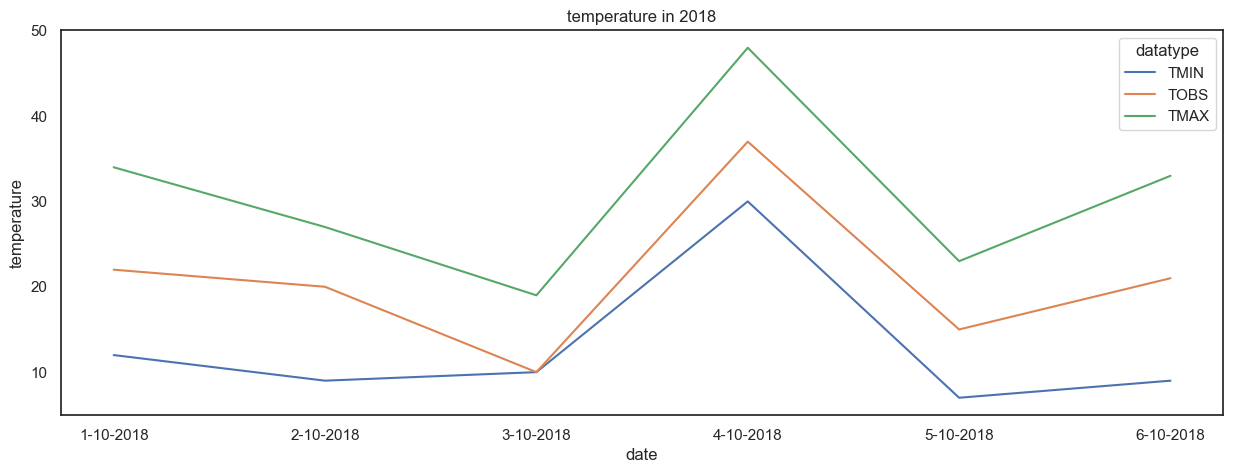

In [12]:
# .head(number)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

long_df=pd.read_csv("long_df.csv",delimiter=";")
wide_df=pd.read_csv("wide_df.csv",delimiter=";")

sns.set(rc={"figure.figsize":(15,5)},style="white")

ax=sns.lineplot(data=long_df,x="date",y="value",hue="datatype")
ax.set_ylabel("temperature")
ax.set_title("temperature in 2018")
plt.show()



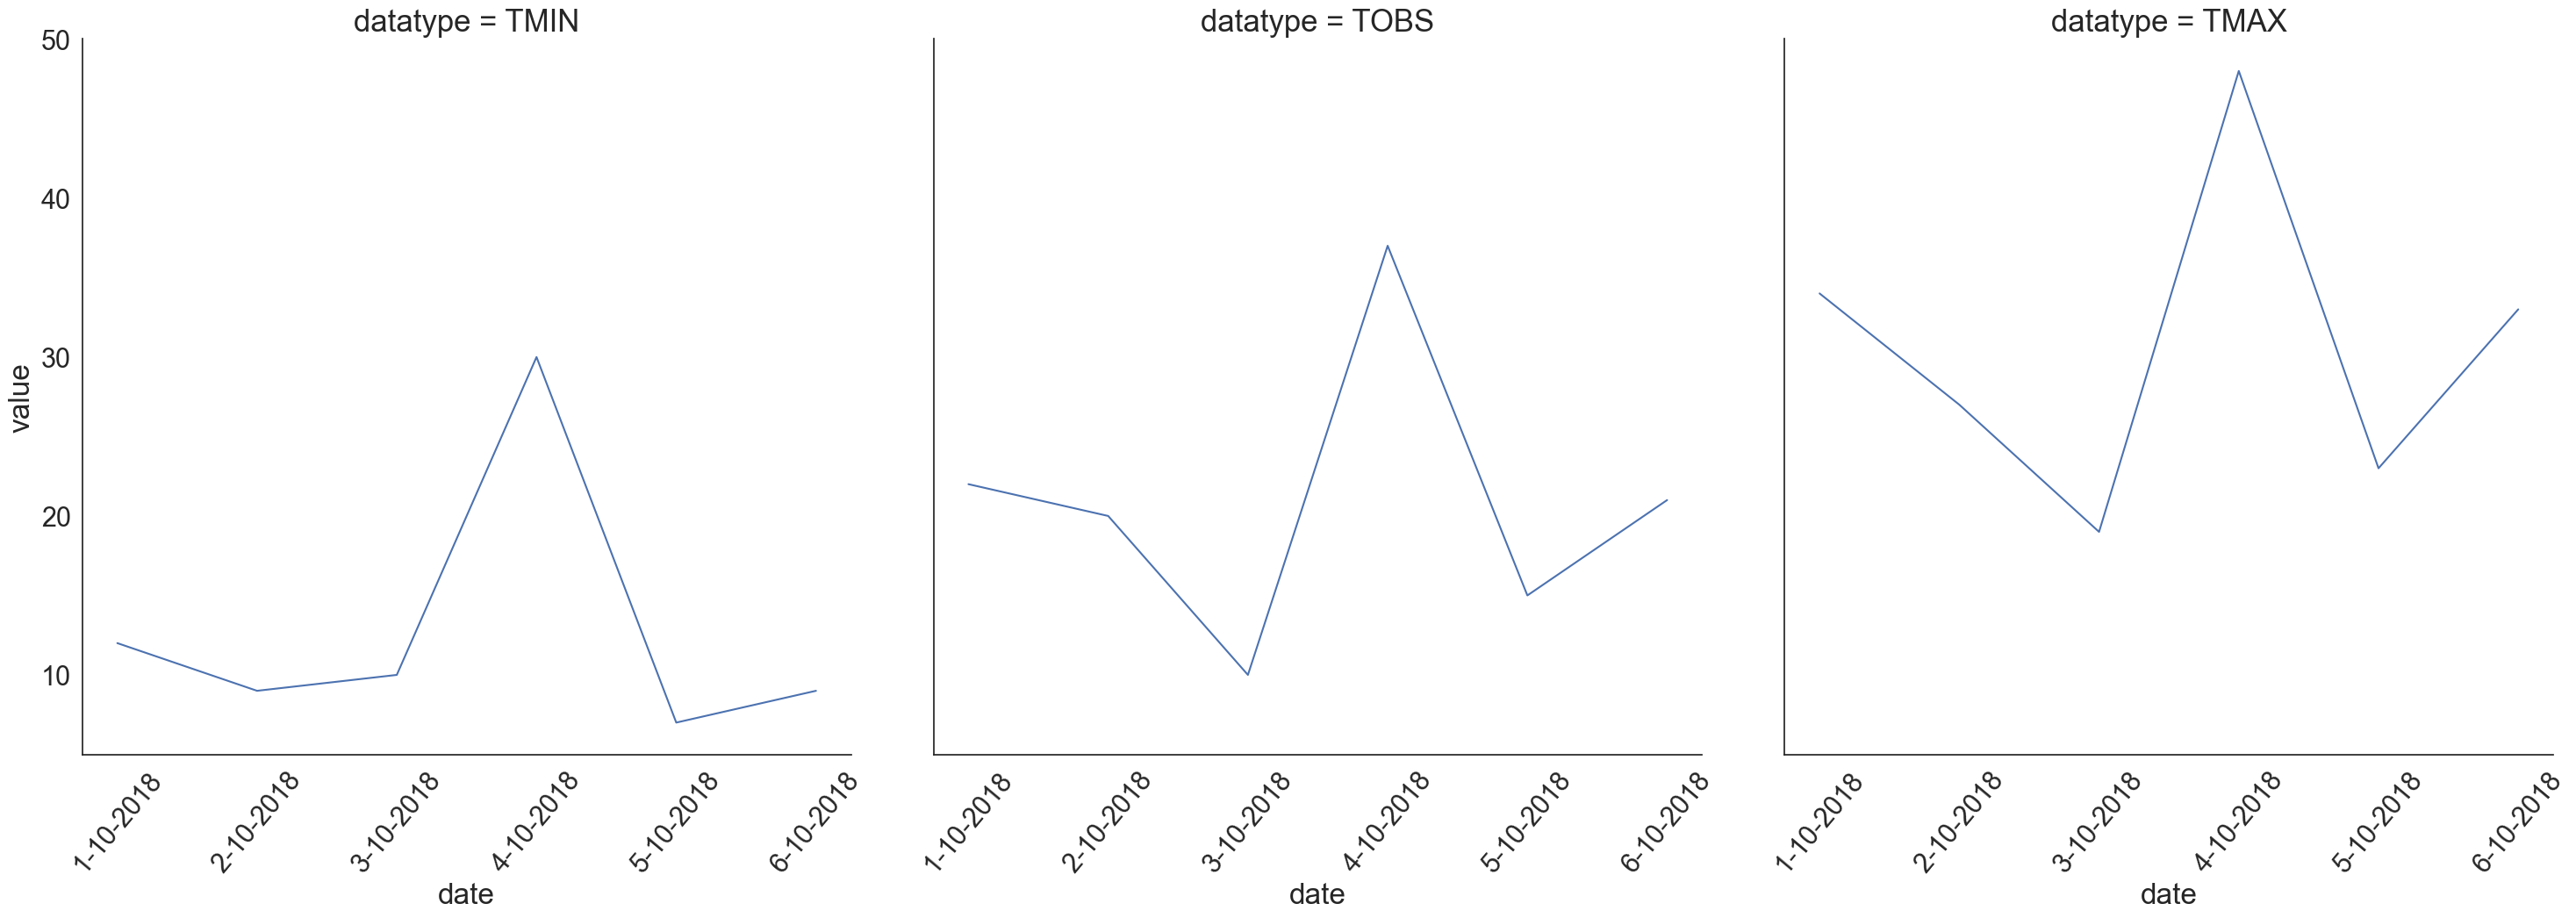

In [13]:
sns.set(rc={"figure.figsize":(20,10)},style="white",font_scale=2)
g=sns.FacetGrid(long_df,col="datatype",height=10)
g=g.map(plt.plot,"date","value")
g.set_titles(size=25)
g.set_xticklabels(rotation=50)
plt.show()

# Cleaning data

In [14]:
#renaming columns

#print column names
long_df.columns

long_df.rename(columns={"value":"temperature"},inplace=True)
long_df.columns

Index(['date', 'datatype', 'temperature'], dtype='object')

In [15]:
# Type conversion

long_df.dtypes

temperature=long_df.temperature.astype("int64")

temperature.dtypes


dtype('int64')

In [16]:
#Add column
new_df=long_df.assign(temp_F=32)
new_df=pd.DataFrame(new_df)
new_df

,date,datatype,temperature,temp_F
0,1-10-2018,TMIN,12,32
1,1-10-2018,TOBS,22,32
2,1-10-2018,TMAX,34,32
3,2-10-2018,TMIN,9,32
4,2-10-2018,TOBS,20,32
5,2-10-2018,TMAX,27,32
6,3-10-2018,TMIN,10,32
7,3-10-2018,TOBS,10,32
8,3-10-2018,TMAX,19,32
9,4-10-2018,TMIN,30,32


In [17]:
#create categories
datatype=pd.Categorical(new_df["datatype"],categories=["TMIN","TOBS","TMAX"],ordered=True)
datatype

#sort
new_df[new_df.datatype=="TMAX"].sort_values(by="temperature",ascending=False).head()
#sort on index
new_df.sort_index().head()


,date,datatype,temperature,temp_F
0,1-10-2018,TMIN,12,32
1,1-10-2018,TOBS,22,32
2,1-10-2018,TMAX,34,32
3,2-10-2018,TMIN,9,32
4,2-10-2018,TOBS,20,32


# Pivoting data

In [18]:
#make pivot table and make the different datatypes columns
pivoted_df=new_df.pivot(index="date",columns="datatype",values=["temperature","temp_F"])
pivoted_df.head()

#find certain information
pivoted_df["temperature"]["TMIN"]
pivoted_df.unstack()

             datatype  date     
temperature  TMAX      1-10-2018    34
                       2-10-2018    27
                       3-10-2018    19
                       4-10-2018    48
                       5-10-2018    23
                       6-10-2018    33
             TMIN      1-10-2018    12
                       2-10-2018     9
                       3-10-2018    10
                       4-10-2018    30
                       5-10-2018     7
                       6-10-2018     9
             TOBS      1-10-2018    22
                       2-10-2018    20
                       3-10-2018    10
                       4-10-2018    37
                       5-10-2018    15
                       6-10-2018    21
temp_F       TMAX      1-10-2018    32
                       2-10-2018    32
                       3-10-2018    32
                       4-10-2018    32
                       5-10-2018    32
                       6-10-2018    32
             TMIN      1-10-201

In [19]:


#use multi-index instead of multiple columns
multi_index_df=new_df.set_index(["date","datatype"])
multi_index_df.head()
multi_index_df=multi_index_df.reset_index()
filtered_df=multi_index_df.loc[multi_index_df["datatype"]=="TMIN"] #filter only TMIN
filtered_df.sort_values("temperature",ascending=True) #sort values

,date,datatype,temperature,temp_F
12,5-10-2018,TMIN,7,32
3,2-10-2018,TMIN,9,32
15,6-10-2018,TMIN,9,32
6,3-10-2018,TMIN,10,32
0,1-10-2018,TMIN,12,32
9,4-10-2018,TMIN,30,32


In [20]:
#fills missing values if any
pivoted_df.unstack(fill_value=0).head()

             datatype  date     
temperature  TMAX      1-10-2018    34
                       2-10-2018    27
                       3-10-2018    19
                       4-10-2018    48
                       5-10-2018    23
dtype: int64

# Melting dataframes

In [21]:
# page 30
print(wide_df.head())

melted_df=wide_df.melt(id_vars="date",value_vars=["TMAX","TMIN","TOBS"],value_name="Temp_C",var_name="measurment")
melted_df

wide_df.set_index("date",inplace=True) #sets date as the index
wide_df.stack() #stacks all the column values below each other (so theyre rows now)

        date  TMAX  TMIN  TOBS
0  1-10-2018    22     9    15
1  2-10-2018    23    13    18
2  3-10-2018    23    13    18
3  4-10-2018    24    14    19
4  5-10-2018    24    14    19


date            
1-10-2018   TMAX    22
            TMIN     9
            TOBS    15
2-10-2018   TMAX    23
            TMIN    13
                    ..
21-10-2018  TMIN    13
            TOBS    18
22-10-2018  TMAX    22
            TMIN     8
            TOBS    15
Length: 66, dtype: int64

In [22]:
#Handling duplicate, missing or invalid data
try:
    wide_df.astype({"TMAX":"int","TOBS":"int","TMIN":"int"})
except: 
    print("could not convert datatype to integers")

print(wide_df.dtypes)
wide_df.describe() #gives information 5 number summary

wide_df["TMIN"][0]=np.nan # make first cell in TMIN NaN object
wide_df["TMIN"][1]=np.inf #make 2nd cell in tmin a infinite value
wide_df.describe()

wide_df.info() #check info to see number of non-null data, we find that there is 1 null in TMIN
contain_nulls=wide_df[wide_df.TMIN.isna()] # check where this null value is in TMIN
print(f"following results were found: {contain_nulls.shape[0]}") #print the lines where NaN is

contain_nullsalt=wide_df[wide_df.TMIN.isin([-np.inf,np.inf])]
print(f'''following results were found: {contain_nullsalt.shape[0]}''')

#find number of columns with inf or Nan data
wrong_data=wide_df[wide_df.TMIN.isna()].shape[0]+wide_df[wide_df.TMIN.isin([-np.inf,np.inf])].shape[0]
wrong_data # provide the sum of wrong data in TMIN column

wide_df_reset=wide_df.reset_index() #makes date no longer the index, but 0 1 2 etc.
wide_df_reset
wide_df_reset.astype({"date": object}) #makes date object type
wide_df_reset.describe(include="object") #gives info on the data of type "object"

wide_df_reset[wide_df_reset.duplicated(keep=False)].shape[0] #adding keep=False makes all duplicates entered. without it you would only get the 2,3 etc. instance in which the duplicate is found

wide_df.dropna() # drops all rows with NaN data
wide_df.dropna(how="all",subset=["TMIN","TMAX"]) # drops all rows that are NaN in both TMIN and TMAX

wide_df.loc[:,"TMIN"].fillna(0,inplace=True) #fills all NaN values in TMIN column with value 0

wide_df=wide_df.assign(TMIN=wide_df.TMIN.replace(11, np.nan),TMAX=wide_df.TMAX.replace(23, np.nan)) #replace values
print(wide_df.head(6))
wide_df=wide_df.assign(TMAX=wide_df.TMAX.fillna(method="bfill"))
wide_df

wide_df.assign(TMIN=np.nan_to_num(wide_df.TMIN)) #use the np.nan_to_num() function; it turns NaN into 0 and inf/-inf into very large positive/negative finite numbers
wide_df.assign(TMIN=np.clip(0,np.inf,wide_df.TMIN)) #makes it in the range 0 to inf

#end of wk 3 pre-class

#lambda x method:
# A lambda function that multiplies two arguments
multiply = lambda x, y: x * y
print(multiply(5, 6))  # Output: 30

wide_df_reset=wide_df_reset.assign(newcolumn=lambda x: x.TMIN.clip(10,x.TMIN)) #here x refers to the dataframe and it is clipped from 10 to the upperbound of x.TMIN so the highest value in the TMIN column
wide_df_reset


TMAX    int64
TMIN    int64
TOBS    int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1-10-2018 to 22-10-2018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMAX    22 non-null     int64  
 1   TMIN    21 non-null     float64
 2   TOBS    22 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2+ KB
following results were found: 1
following results were found: 1
           TMAX  TMIN  TOBS
date                       
1-10-2018  22.0   0.0    15
2-10-2018   NaN   inf    18
3-10-2018   NaN  13.0    18
4-10-2018  24.0  14.0    19
5-10-2018  24.0  14.0    19
6-10-2018  22.0  12.0    17
30


C:\Users\jurge\AppData\Local\Temp\ipykernel_24620\2347939279.py:10: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wide_df["TMIN"][0]=np.nan # make first cell in TMIN NaN object
C:\Users\jurge\AppData\Local\Temp\ipykernel_24620\2347939279.py:11: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  wide_df["TMIN"][1]=np.inf #make 2nd cell in tmin a infinite value
C:\Users\jurge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - value

,date,TMAX,TMIN,TOBS,newcolumn
0,1-10-2018,22,NaN,15,NaN
1,2-10-2018,23,inf,18,inf
2,3-10-2018,23,13.0,18,13.0
3,4-10-2018,24,14.0,19,14.0
4,5-10-2018,24,14.0,19,14.0
5,6-10-2018,22,12.0,17,12.0
6,7-10-2018,20,12.0,16,12.0
7,8-10-2018,22,11.0,16,11.0
8,9-10-2018,24,11.0,17,11.0
9,10-10-2018,25,12.0,18,12.0
